In [ ]:
##참고자료: 파이썬으로 배우는 웹 크롤러(박정태), 윤성인 - 머신러닝 딥러닝 실전 개발 입문 유투브 강의

# 요청 모듈

파이썬에서 웹을 요청하는 라이브러리는 크게 두가지 requests 와 urllib이 있습니다. urllib보다는 requests를 더 많이 사용합니다. 먼저 requesrs 모듈을 설치합니다.(Anaconda 사용시 이미 깔려있습니다)




$ pip install requests

In [2]:
import requests as rq

import requests 를 실행했을 때 아무런 메시지가 뜨지 않는다면 모듈이 정상적으로 import된것!  이제 본격적으로 HTML코드를 가져와보자!

보아즈 10기 찬규형의 깃헙주소를 예시로 썼다. follow 부탁드린다.

In [2]:
url = "https://github.com/chankoo/python"

res = rq.get(url) #get 함수를 이용하여 url의 html코드를 가져온다.

print(res.content) #바이너리 형태로 HTML을 가져온다. res.text로도 가져올 수 있다. 

b'\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://assets-cdn.github.com">\n  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-pCRDtdb3GlUU48h+oRJVA8f0GddrLnU97wB7mHQ7q6c40vMbMMZsFdk0IMhkUFRqw1M/y4EkWxtaKwfeFezOkQ==" rel="stylesheet" href="https://assets-cdn.github.com/assets/frameworks-73f533b7cc08a9d040e601cfd38fa585.css" />\n  <link crossorigin="anonymous" media="all" integrity="sha512-6y0NAOyumZW4f5iG7VlDJBUKOry4lRb1mS0fAfwQYiTGX6e+r/vqqnKszdYL3

# 파싱모듈

요청 모듈로 가져온 HTML 코드를 파이썬이 쓸 수 있는 코드로 변환해 주어야 합니다. 

bs4을 사용하여 HTML코드를 파이썬에서 사용가능한 객체로 바꿔줄 수 있습니다. 

bs4는 파이썬 내장 모듈이기 때문에 추가로 설치할 필요가 없습니다. bs4를 사용하기 위해 import해줍니다

In [3]:
import bs4
from bs4 import BeautifulSoup
html = """<html> <head> </head> <body> <p> 강민 </p> </body></html>"""
soup = bs4.BeautifulSoup(html,'html.parser') # 파서란 원시코드인 순수 문자열 객체를 해석할 수 있도록 분석하는것. 
                                      # 속도가 빠르기 때문에 lxml을 보통 쓴다.
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <p>
   강민
  </p>
 </body>
</html>


## 간단한 태그 접근

soup.[태그 이름]의 형태로 태그의 정보를 가져올 수 있다. 하지만 이 경우는 가장 첫번째로 등장하는 태그의 정보만 가져온다. 만약 soup.p를 한다면 가장 먼저 등장하는 p태그의 정보만 가져온다

In [4]:
from bs4 import BeautifulSoup
html = """<html> <head><title>연식</title></head> <body><p>p1</p> <p>p2</p> <p>p3</p> </body></html>"""
soup = bs4.BeautifulSoup(html,'html.parser')
print(soup.prettify())

print("-"*30)

print(soup.p) #첫번째 태그 p2,p3는 가져오지 못한다
print(soup.p.string) #해당 태그의 값


<html>
 <head>
  <title>
   연식
  </title>
 </head>
 <body>
  <p>
   p1
  </p>
  <p>
   p2
  </p>
  <p>
   p3
  </p>
 </body>
</html>
------------------------------
<p>p1</p>
p1


## 속성 데이터

a 태그의 href 속성, img 태그의 src속성을 가져오기 위해서는 속성에 접근해야 됩니다.

In [8]:
from bs4 import BeautifulSoup
html = """<html> <head><title class="t" id = "ti"> 혜원 </title></head> <body><p>선우</p><p>혜린</p><p>태희</p></body></html>"""
soup = BeautifulSoup(html,'html.parser')
print(soup.prettify())

print("-"*30)

print(soup.title.attrs) #타이틀 태그의 속성에 접근 (attributes)
print(soup.title['class']) #타이틀 태그의 class속성값
print(soup.title['id']) #타이틀 태그의 id속성값

<html>
 <head>
  <title class="t" id="ti">
   혜원
  </title>
 </head>
 <body>
  <p>
   선우
  </p>
  <p>
   혜린
  </p>
  <p>
   태희
  </p>
 </body>
</html>
------------------------------
{'class': ['t'], 'id': 'ti'}
['t']
ti


## 원하는 요소 정확히 접근하기

find_all()함수를 이용하면 우리가 원하는 태그들을 리스트의 형태로 얻어올 수 있습니다


In [7]:
#원하는 태그 가져오기
from bs4 import BeautifulSoup
html = """<html> <head><title>준호</title></head><body><p>명아</p><p>지원</p><p>성현</p></body></html>"""
soup = BeautifulSoup(html,'html.parser')
print(soup.prettify())

print("-"*30)

print(soup.find_all('title')) #title태그를 가져온다 (find_all 함수 이용하면, 해당태그를 가진 내용 모두)
print(soup.find_all('p')) #p태그를 가져온다
 

<html>
 <head>
  <title>
   준호
  </title>
 </head>
 <body>
  <p>
   명아
  </p>
  <p>
   지원
  </p>
  <p>
   성현
  </p>
 </body>
</html>
------------------------------
[<title>준호</title>]
[<p>명아</p>, <p>지원</p>, <p>성현</p>]


In [10]:
# id값으로 가져오기
from bs4 import BeautifulSoup

html = """<html> <head><title>준호</title></head><body><p id = 'd'>명아</p><p>지원</p><p>성현</p></body></html>"""
soup = BeautifulSoup(html,'html.parser')
print(soup.prettify())

print("-"*30)
print(soup.find_all(id = 'd')) # id=d인 태그를 가져온다    
print(soup.find_all('p'))

<html>
 <head>
  <title>
   준호
  </title>
 </head>
 <body>
  <p id="d">
   명아
  </p>
  <p>
   지원
  </p>
  <p>
   성현
  </p>
 </body>
</html>
------------------------------
[<p id="d">명아</p>]
[<p id="d">명아</p>, <p>지원</p>, <p>성현</p>]


In [11]:
#원하는 태그 원하는 값으로 태그 가져오기
from bs4 import BeautifulSoup
html = """<html> <head><title>준호</title></head><body><p class = 'd'>명아</p><p class='c'>지원</p><p>성현</p></body></html>"""
soup = BeautifulSoup(html,'html.parser')
print(soup.prettify())

print("-"*30)
print(soup.find_all('p',class_='d')) #클라스 속성이 d인 p태그를 찾는다.
print(soup.find_all('p',class_='c'))
print(soup.find_all('p','c')) #클라스는 굳이 class_쓰지 않고 비워도 된다.

<html>
 <head>
  <title>
   준호
  </title>
 </head>
 <body>
  <p class="d">
   명아
  </p>
  <p class="c">
   지원
  </p>
  <p>
   성현
  </p>
 </body>
</html>
------------------------------
[<p class="d">명아</p>]
[<p class="c">지원</p>]
[<p class="c">지원</p>]


In [19]:
#텍스트 속성 이용하여 필요한 태그 가져오기
from bs4 import BeautifulSoup
html = """<html> <head><title>준호</title></head><body><p class = 'd'>명아</p><p class='c'>지원</p><p>성현</p></body></html>"""
soup = BeautifulSoup(html,'lxml')
print(soup.prettify())

print("-"*30)
print(soup.find_all('p',text="명아")) #p태그중에서 '명아'라는 태그를 찾는 코드
print(soup.p)

<html>
 <head>
  <title>
   준호
  </title>
 </head>
 <body>
  <p class="d">
   명아
  </p>
  <p class="c">
   지원
  </p>
  <p>
   성현
  </p>
 </body>
</html>
------------------------------
[<p class="d">명아</p>]
<p class="d">명아</p>


find 를 사용하면 해당 페이지에서 찾고자 하는 요소가 하나만 있을 때 사용하는 것이 좋습니다. 가장 많이 사용되는 예가 id값으로 접근하는 요소입니다

In [18]:
from bs4 import BeautifulSoup
html = """<html><head><title>신상윤</title></head><body><p>시은</p><p class='d'>영현</p><p class = "c">선영</p></p><a>예린</a><b>준현</b></body></html>"""
soup = BeautifulSoup(html,'lxml')

print(soup.prettify())
print("-"*30)
print(soup.find('p')) #첫번째 p태그만 출력됨
print(soup.p)

<html>
 <head>
  <title>
   신상윤
  </title>
 </head>
 <body>
  <p>
   시은
  </p>
  <p class="d">
   영현
  </p>
  <p class="c">
   선영
  </p>
  <a>
   예린
  </a>
  <b>
   준현
  </b>
 </body>
</html>
------------------------------
<p>시은</p>
<p>시은</p>


select()함수를 이용하면 find_all()처럼 리스트로 반환합니다. 하지만 select()는 CSS셀렉터를 활용하여 원하는 요소에 접근합니다. 클래스는 마침표(.), 아이디는 샵(#) 그리고 자식 태그를 표현할 땐 띄어쓰기를 사용합니다.

In [39]:
from bs4 import BeautifulSoup
html = """<html><head><title>윤회</title></head><body><p id = "i" class = "a">현석</p><p class = "d">지연</p><p class = "d">상우</p></p><a>연식</a><b>강민</b></body></html>"""
soup = BeautifulSoup(html,'lxml')
print(soup.prettify())
print("-"*30)
print(soup.select('p')) #문서에서 모든 p요소를 찾아준다
print(soup.select('.d')) # 문서에서 클래스가 d인 모든 요소를 찾아준다
print(soup.select('p.d')) #문서에서 태그가 p이고 클래스가 d인 모든 요소를 찾아준다
print(soup.select('#i')) #문서에서 아이디가 i인 모든 요소를 찾아준다
print(soup.select('p#i')) #문서에서 태그가 p이고 아이디가 i인 모든 요소를 찾아준다
print(soup.select('body .d')) # 문서에서 body태그 안에 클래스가 d인 모든 요소를 찾아준다

<html>
 <head>
  <title>
   윤회
  </title>
 </head>
 <body>
  <p class="a" id="i">
   현석
  </p>
  <p class="d">
   지연
  </p>
  <p class="d">
   상우
  </p>
  <a>
   연식
  </a>
  <b>
   강민
  </b>
 </body>
</html>
------------------------------
[<p class="a" id="i">현석</p>, <p class="d">지연</p>, <p class="d">상우</p>]
[<p class="d">지연</p>, <p class="d">상우</p>]
[<p class="d">지연</p>, <p class="d">상우</p>]
[<p class="a" id="i">현석</p>]
[<p class="a" id="i">현석</p>]
[<p class="d">지연</p>, <p class="d">상우</p>]


## 실전예제

### 네이버 금융에서 환율정보 가져오기

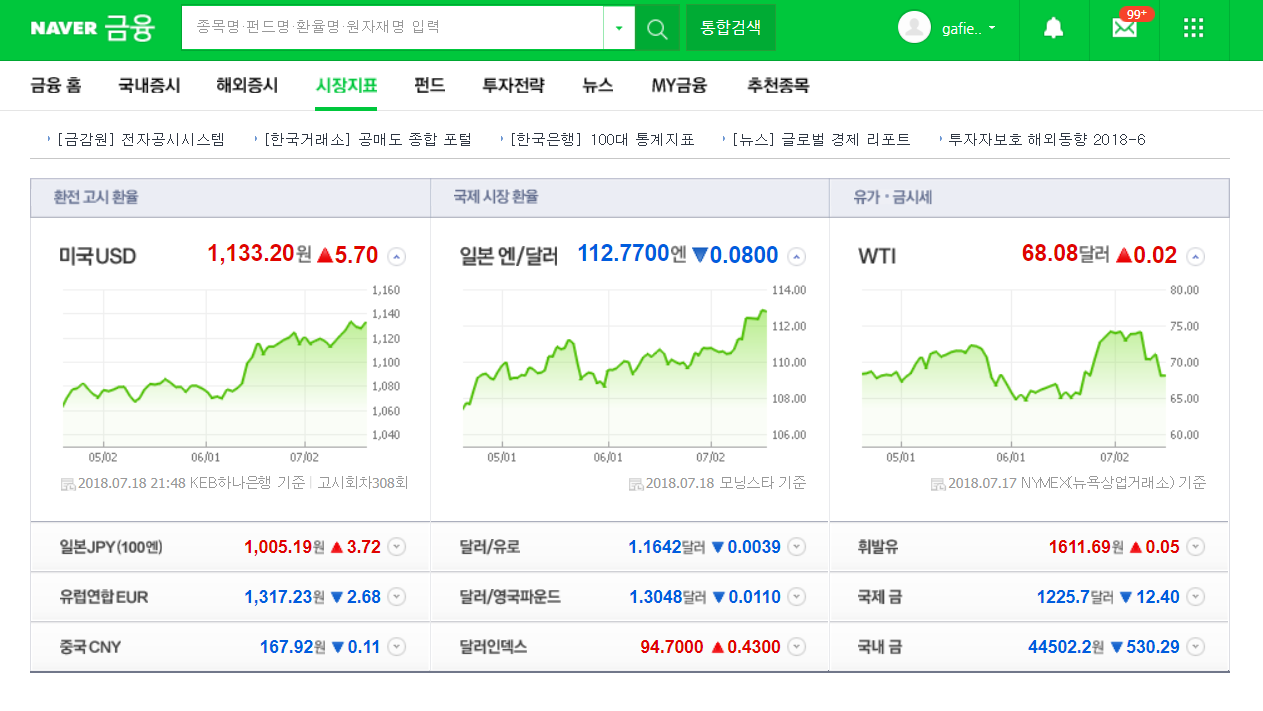

In [4]:
import requests as rq
from bs4 import BeautifulSoup
url = "http://info.finance.naver.com/marketindex/"
res = rq.get(url)
soup  = BeautifulSoup(res.content,'lxml')

마우스 오른쪽 클릭 - 검사 를 누르면 해당 페이지의 소스를 볼 수 있다.

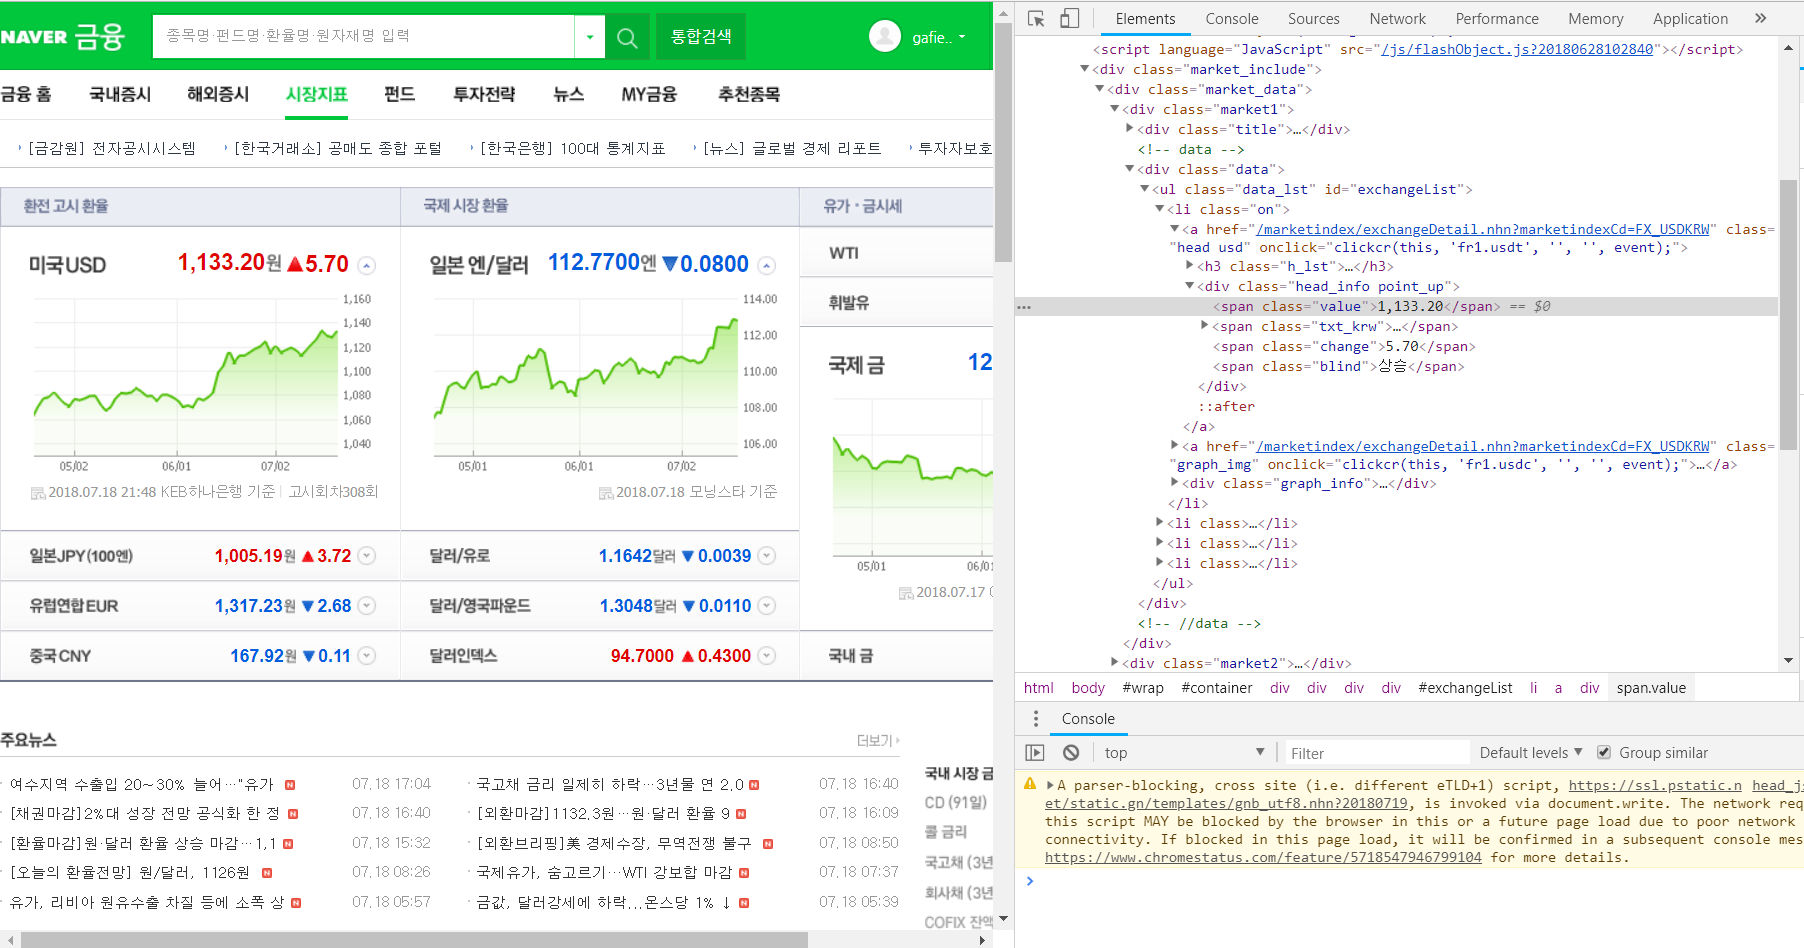

미국 USD 환율 정보가 span 태그의 class='value'인 걸 확인할 수 있다. select 함수를 이용한다

In [7]:
results = soup.select('span.value')
for result in results:
    print(result.string)

1,133.20
1,005.19
1,317.23
167.92
112.7700
1.1642
1.3048
94.7000
68.08
1611.69
1225.7
44502.2


미국 USD 환율정보와 일본 엔/달러에 관심이 있다면 그 요소들만 뽑아낸다

In [10]:
print("미국 USD환율",":",results[0].string)
print("일본 엔/달러",":",results[4].string)

미국 USD환율 : 1,133.20
일본 엔/달러 : 112.7700
